# Facial Recognition System

In this problem you will go through multiple iteration of implementing a facial recognition system each with increasing complexity

The data for this problem is based on Oivetti database from ATT. The whole dataset contains face images of 40 people with the same lighting condition. Each image is $64\times64$ pixels.

For this problem use scikit-learn for logistic.http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [107]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import expit
from scipy.optimize import minimize
import warnings
from sklearn.linear_model import LogisticRegression

In [19]:
data = np.load('homework7.npz')

In [20]:
list(data.keys())
train_data = data['train_data']
train_classes = data['train_classes']
test_data = data['test_data']
test_classes = data['test_classes']
def show_image(faces):
    img = faces.reshape(64,64).T
    plt.imshow(img, cmap='gray')

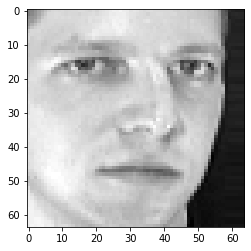

In [21]:
show_image(train_data[:, 1])

**Task 1** Train a logistic classifer based on the raw images. This means you have 4096 features. Report correct percentage from test sample.

In [111]:
train_classes.shape

(280,)

In [203]:
lgst = LogisticRegression(max_iter=1000).fit(train_data.T, train_classes)

In [218]:
pred = lgst.predict(test_data.T)

In [219]:
print(np.sum(test_classes==pred)/ len(pred))
print(len(pred))

0.9583333333333334
120


**Task 2.** Perform low rank approximation and keep only the first 100 features. Then classify it with logistic classifier. Report correct percentage from test sample.

In [220]:
u_x, s_x, v_x = np.linalg.svd(train_data.T)

In [221]:
k = 100
v_x_k = v_x[:k, :]
coeff_train = np.dot(train_data.T, v_x_k.T)
coeff_train.shape

(280, 100)

In [222]:
coeff_test = np.dot(test_data.T, v_x_k.T)

In [223]:
lgst2 = LogisticRegression(max_iter=1000).fit(coeff_train, train_classes)

In [224]:
pred2 = lgst2.predict(coeff_test)

In [225]:
print(np.sum(test_classes==pred2)/ len(pred2))
print(len(pred2))

0.9666666666666667
120


**Task 3.** Perform low rank approximation and keep only the first 100 features. Then perform PCA on the 100 features you got to select only the top 50. Then classify it with logistic classifier. Report the correct percentage from the test sample.

In [226]:
import sklearn as sk
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [227]:
pipe = Pipeline([
    ('pca', PCA(50)),
    ('logistic', LogisticRegression(max_iter=1000))
])

In [228]:
pipe.fit(coeff_train, train_classes)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=50,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [229]:
test_result = pipe.predict(coeff_test)

In [230]:
print(np.sum(test_classes==test_result)/ len(test_result))
print(len(test_result))

0.9666666666666667
120
